In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
import zipfile



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
!mkdir -p ~/.kaggle
!cp "/content/drive/MyDrive/DL Data Files/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 96% 1.02G/1.06G [00:09<00:00, 123MB/s]
100% 1.06G/1.06G [00:09<00:00, 124MB/s]


In [4]:
with zipfile.ZipFile("/content/dogs-vs-cats.zip","r") as zip_ref:
  zip_ref.extractall("/content")

In [5]:
conv_base = VGG16(
    weights='imagenet',  # weights is used from imagenet dataset
    include_top = False,  # is we use false thats means not include feature extraction part
    input_shape=(150,150,3)   # 150 x 150 image size and 3 is color
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:

model1 = Sequential()

model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:

# generators
train_ds1 = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds1 = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds1 = train_ds1.map(process)
validation_ds1 = validation_ds1.map(process)

In [10]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [11]:
history = model1.fit(train_ds1,epochs=10,validation_data=validation_ds1)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 130ms/step - accuracy: 0.8375 - loss: 0.3898 - val_accuracy: 0.9098 - val_loss: 0.2159
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 136ms/step - accuracy: 0.9178 - loss: 0.1958 - val_accuracy: 0.9168 - val_loss: 0.2059
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 135ms/step - accuracy: 0.9351 - loss: 0.1584 - val_accuracy: 0.9152 - val_loss: 0.2130
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 136ms/step - accuracy: 0.9504 - loss: 0.1265 - val_accuracy: 0.9170 - val_loss: 0.2290
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 128ms/step - accuracy: 0.9580 - loss: 0.1051 - val_accuracy: 0.9104 - val_loss: 0.2764
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 127ms/step - accuracy: 0.9685 - loss: 0.0803 - val_accuracy: 0.9152 - val_loss: 0.2862
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.9727 - loss: 0.0695 - val_accuracy: 0.9186 - val_loss: 0.2733
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 136ms/step - accuracy: 0.9830 - los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
DOG


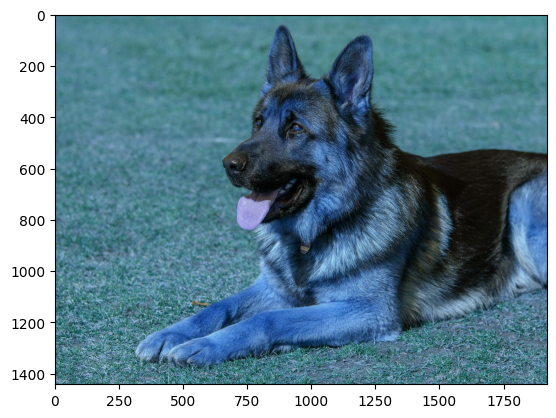

In [17]:
import cv2
import matplotlib.pyplot as plt

test_img = cv2.imread('/content/drive/MyDrive/DL Data Files/dog2.jpg')
plt.imshow(test_img)
test_img.shape

test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))
model1.predict(test_input) # 0 is cat and 1 is dog

if (model1.predict(test_input))==1:
    print("DOG")
else:
    print("CAT")